In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

signal=100
delta=0.5
flucLow=0.59
flucHigh=0.61


avAlphaVec=[]
avBetaVec=[]
avGammaVec=[]
for j in range(0,100):
    
    minAlpha=0
    minBeta=0
    minGamma=0
    minTimeScore=10000
    alpha=0.5
    beta=0.5
    gamma=0.5
    alphaVec=[alpha]
    betaVec=[beta]
    gammaVec=[gamma]
    oldTimeScore=10000
    for i in range(0,100000):
        p1Conc=0.5
        p2Conc=0.5
        p3Conc=0.5
        
        for k in range(0,10000):
            p1Conc=(1-alpha-beta)*p1Conc+signal
            p2Conc=(1-gamma)*p2Conc+ alpha*p1Conc
            p3ConcOld=p3Conc
            p3Conc=(1-delta)*p3Conc-gamma*p2Conc+beta*p1Conc
            if p3ConcOld == p3Conc and k>0:
                timeScore=k
                
                break
        #if timeScore> oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        #if timeScore< oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        if timeScore< minTimeScore and p3Conc >flucLow and p3Conc < flucHigh:
            #print(timeScore)
            minTimeScore = timeScore
            minAlpha=alpha
            minBeta=beta
            minGamma=gamma
            minp3=p3Conc
        #print(p3Conc)
        oldTimeScore=timeScore
        oldAlpha=alpha
        oldBeta=beta
        oldGamma=gamma   
        if p3Conc <0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta <0.99:
                beta=beta+0.01
            if rando > 0.33 and rando <= 0.66 and alpha>0.01:
                alpha=alpha-0.01
            if rando >0.66 and gamma> 0.01:
                gamma = gamma - 0.01
        if p3Conc >= 0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta>0.01:
                beta=beta-0.01
            if rando > 0.33 and rando <= 0.66 and alpha<0.99:
                alpha=alpha+0.01
            if rando >0.66 and gamma<0.99:
                gamma = gamma + 0.01
        alphaVec.append(alpha)
        betaVec.append(beta)
        gammaVec.append(gamma)
    #avAlphaVec.append(alphaVec[999])
    #avBetaVec.append(betaVec[999])
    #avGammaVec.append(gammaVec[999])
    #plt.plot(avAlphaVec,'r.')
    #plt.plot(avBetaVec,'b.')
    #plt.plot(avGammaVec,'g.')
    #plt.show()
    print("min",minTimeScore, minAlpha,minBeta,minGamma,minp3)

KeyboardInterrupt: 

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout


vertices=5
edgeProb=0.4
G=nx.erdos_renyi_graph(vertices,edgeProb,directed=True)
G.add_edge(0, 0)
duplicationGenes = [0,1,2]
G_dup=gf.duplicate_genes(G,duplicationGenes)


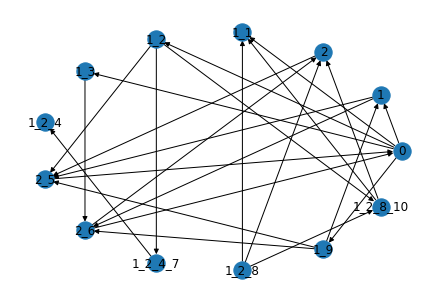

In [4]:
n=10
m=3
qCon=0.5
qMod = 0.5
G=nx.DiGraph(nx.scale_free_graph(2))
G,G3=gf.network_birth(G,n,n,qCon,qMod)
G1,G2=gf.network_birth(G,m,m,qCon,qMod,iteration = n)
G=gf.label_conserver(G)
G1=gf.label_conserver(G1)
G2=gf.label_conserver(G2)
#print(len(list(G1.nodes)),len(list(G2.nodes)))
nx.draw_circular(G,with_labels=True)
G1_orig=copy.deepcopy(G1)
G2_orig=copy.deepcopy(G2)
G_orig=copy.deepcopy(G)
G1_forest=gf.duplication_forest(G1,n+m)
G2_forest=gf.duplication_forest(G2,n+m)



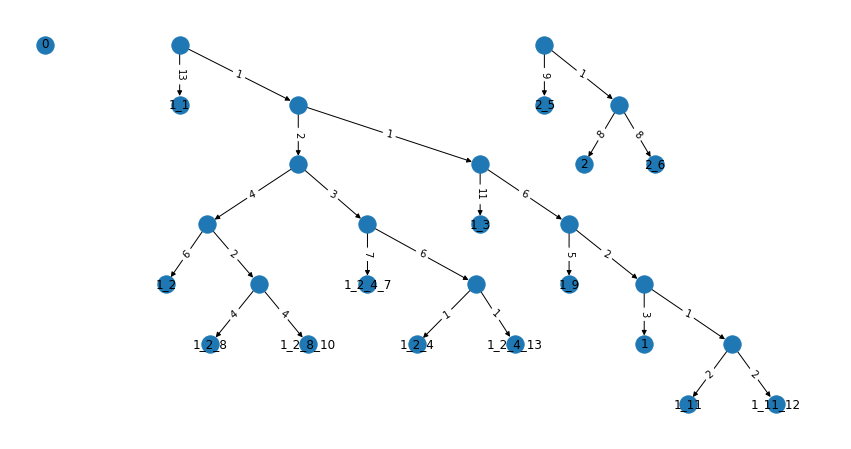

In [5]:
plt.figure(figsize=(15, 8))
pos=nx.circular_layout(G1_forest)
edge_labels = dict([((n1, n2), G1_forest[n1][n2]['weight'])
                    for n1, n2 in G1_forest.edges])

#nx.draw_circular(G1_forest,with_labels=True)
#print(nx.is_forest(G1_forest))
#gf.tree_distance_loop('0_4','0_1',G1_forest)
#gf.closest_neighbour_distance('1_4','1_1_4',G1_forest,G2_forest)
#g=Network(height=800,width=800)
#g.barnes_hut()
#g.from_nx(G1_forest)
#g.show("e.html")
labels={}
for node in G1_forest.nodes():
    if G1_forest.out_degree(node)==0:
        labels[node]=node
pos=graphviz_layout(G1_forest,prog="dot")
nx.draw_networkx_edge_labels(G1_forest, pos, edge_labels=edge_labels)
nx.draw(G1_forest,pos,with_labels=False)
nx.draw_networkx_labels(G1_forest,pos,labels)
plt.show()

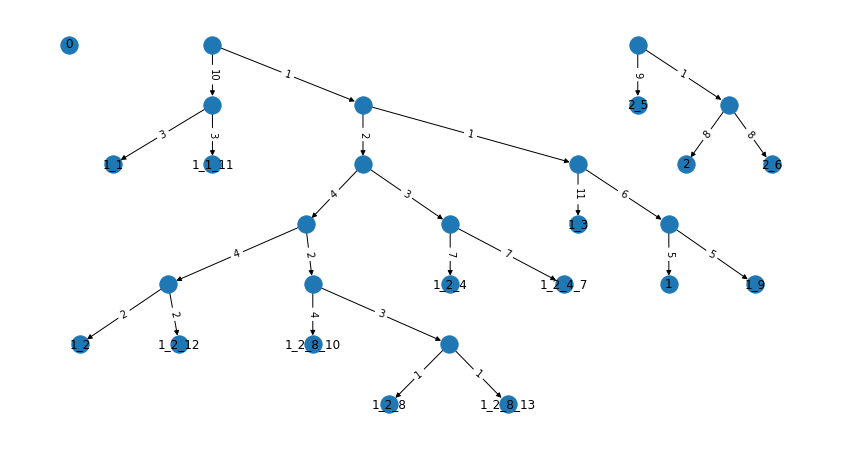

In [6]:
plt.figure(figsize=(15, 8))
pos=nx.circular_layout(G2_forest)
edge_labels = dict([((n1, n2), G2_forest[n1][n2]['weight'])
                    for n1, n2 in G2_forest.edges])

#print(nx.is_forest(G2_forest))
labels={}
for node in G2_forest.nodes():
    if G2_forest.out_degree(node)==0:
        labels[node]=node
pos=graphviz_layout(G2_forest,prog="dot")
nx.draw_networkx_edge_labels(G2_forest, pos, edge_labels=edge_labels)
nx.draw(G2_forest,pos,with_labels=False)
nx.draw_networkx_labels(G2_forest,pos,labels)
plt.show()

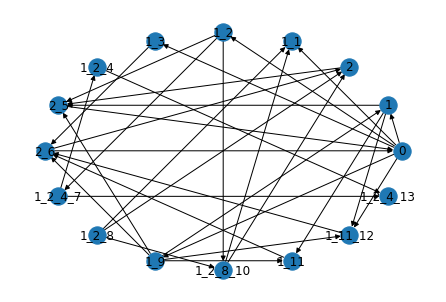

In [7]:
nx.draw_circular(G1,with_labels=True)

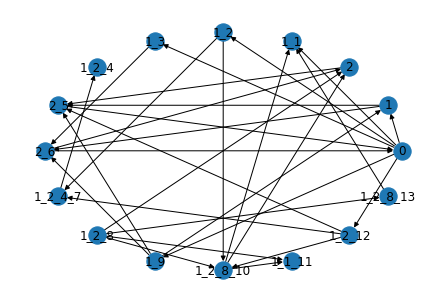

In [8]:
nx.draw_circular(G2,with_labels=True)

EC: 0.65625
ICS: 0.9545454545454546
S3: 0.6363636363636364
Original Modified NC SCore  0.7788461538461541


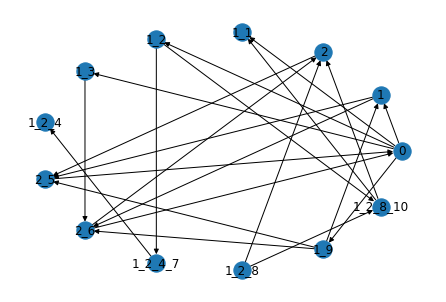

In [9]:
sourceEdges= len(list(G1.edges()))
#print(sourceEdges)
conservedEdge=0

for x in list(G1.nodes):
    for y in list(G2.nodes):
        if (x,y) in list(G1.edges) and (x,y) in list(G2.edges):
            conservedEdge=conservedEdge+1
#print(conservedEdge)
print("EC:",conservedEdge/sourceEdges)

G2_ind = nx.induced_subgraph(G2,list(G1.nodes))
nx.draw_circular(G2_ind,with_labels=True)
inducedEdges=len(list(G2_ind.edges))
print("ICS:",conservedEdge/inducedEdges)
print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))
originalNCScore=gf.original_networks_NC_score(G1,G2,G1_forest,G2_forest,n+m,m)
print("Original Modified NC SCore ",gf.original_networks_NC_score(G1,G2,G1_forest,G2_forest,n+m,m))
#print("New MEtric",2*conservedEdge/(sourceEdges+inducedEdges))

In [10]:


G=nx.convert_node_labels_to_integers(G_orig)
G1=nx.convert_node_labels_to_integers(G1_orig)
G2=nx.convert_node_labels_to_integers(G2_orig)
alignVec,mapped=gf.NF_many_to_one(G1,G2,2,0.8)
mapping = dict(alignVec)
#print(mapped)
G1_mapped=nx.induced_subgraph(G1,list(mapped))
G1_mapped=nx.relabel_nodes(G1_mapped,mapping)

print("Alignment mapping:",alignVec)
#print(G1_mapped.edges)
#print(G2.edges)


Alignment mapping: [(0, 0), (7, 7), (10, 10), (11, 14), (8, 8), (2, 2), (1, 14), (4, 11), (12, 1), (14, 3), (3, 3), (13, 9), (15, 3), (9, 4), (5, 5), (6, 5)]


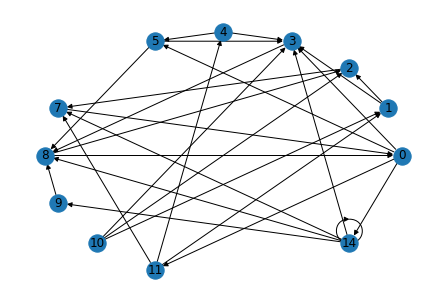

In [11]:
pos=nx.circular_layout(G2)
nx.draw(G1_mapped,with_labels=True,pos=pos)


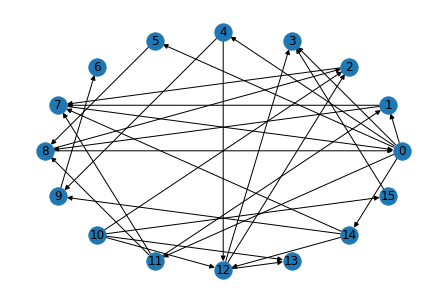

In [12]:

nx.draw(G2,with_labels=True,pos=pos)


27
14
EC: 0.5185185185185185
ICS: 0.7
S3: 0.42424242424242425
13 3
Modified NC Score of Alignment 0.3365384615384615
Original Modified NC Score 0.7788461538461541
Quality of Alignment Based off NC Score 0.4320987654320986


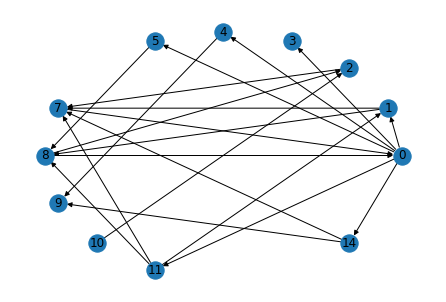

In [13]:
sourceEdges= len(list(G1_mapped.edges()))
print(sourceEdges)
conservedEdge=0
for x in range(0,max(len(list(G1_mapped.nodes)),len(list(G2.nodes)))):
    for y in range(0,max(len(list(G1_mapped.nodes)),len(list(G2.nodes)))):
        if (x,y) in list(G1_mapped.edges) and (x,y) in list(G2.edges):
            conservedEdge=conservedEdge+1
print(conservedEdge)
print("EC:",conservedEdge/sourceEdges)

G2_ind = nx.induced_subgraph(G2,list(G1_mapped.nodes))
inducedEdges=len(list(G2_ind.edges))
print("ICS:",conservedEdge/inducedEdges)
print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))
#print("New MEtric",2*conservedEdge/(sourceEdges+inducedEdges))
nx.draw(G2_ind,with_labels=True,pos=pos)
print(n+m,m)
modifiedNCScore=gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest,DMCSteps=n+m,childDistance=m)
print("Modified NC Score of Alignment",gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest,DMCSteps=n+m,childDistance=m))
print("Original Modified NC Score",originalNCScore)
print("Quality of Alignment Based off NC Score",1-(originalNCScore-modifiedNCScore)/originalNCScore)

[0, 3, 10, 2, 7, 1, 11, 4, 12, 14, 13, 8, 9]


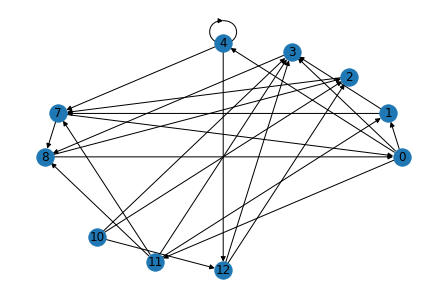

In [14]:

alignVec,mapped=gf.NF_many_to_one(G1,G,32,0.8)
print(mapped)
G1=nx.induced_subgraph(G1,list(mapped))
mapping = dict(alignVec)
G1=nx.relabel_nodes(G1,mapping)
nx.draw(G1,with_labels=True,pos=pos)

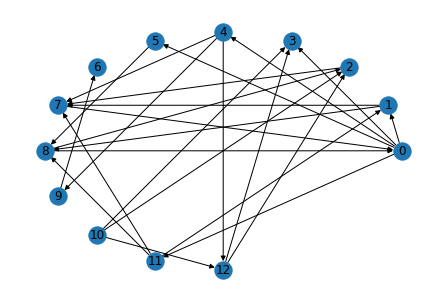

In [15]:
nx.draw(G,with_labels=True,pos=pos)

In [16]:
def node_match(a,b):
    print(a,b)
    if a==b:
        return True
    else:
        return False
gf.graph_edit_distance(G1,G2,node_match)

AttributeError: module 'gene_functions' has no attribute 'graph_edit_distance'

In [17]:
maxQuality=0
for a in range(0,50):
    for b in np.arange(0,2,0.2):
        G=nx.convert_node_labels_to_integers(G_orig)
        G1=nx.convert_node_labels_to_integers(G1_orig)
        G2=nx.convert_node_labels_to_integers(G2_orig)
        alignVec,mapped=gf.NF_many_to_one(G1,G2,a,b)
        mapping = dict(alignVec)

        G1_mapped=nx.induced_subgraph(G1,list(mapped))
        G1_mapped=nx.relabel_nodes(G1_mapped,mapping)
        modifiedNCScore=gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest,DMCSteps=n+m,childDistance=m)
        quality=1-(originalNCScore-modifiedNCScore)/originalNCScore
        #print("Modified NC Score of Alignment",modifiedNCScore)
        #print("Original Modified NC Score",originalNCScore)
        #print("Quality of Alignment Based off NC Score",1-(originalNCScore-modifiedNCScore)/originalNCScore)
        #print("Alignment mapping:",alignVec)
        print(a,b,quality)
        if quality >maxQuality:
            maxQuality=quality
            maxA=a
            maxB=b
print(maxA,maxB,maxQuality)


0 0.0 0.345679012345679
0 0.2 0.345679012345679
0 0.4 0.376543209876543
0 0.6000000000000001 0.3580246913580246
0 0.8 0.2901234567901233
0 1.0 0.16666666666666663
0 1.2000000000000002 0.16666666666666663
0 1.4000000000000001 0.09876543209876543
0 1.6 0.05555555555555547
0 1.8 0.0
1 0.0 0.4320987654320986
1 0.2 0.5432098765432096
1 0.4 0.4814814814814813
1 0.6000000000000001 0.4444444444444442
1 0.8 0.43827160493827144
1 1.0 0.2901234567901233
1 1.2000000000000002 0.28395061728395055
1 1.4000000000000001 0.21604938271604923
1 1.6 0.11111111111111116
1 1.8 0.0
2 0.0 0.493827160493827
2 0.2 0.493827160493827
2 0.4 0.493827160493827
2 0.6000000000000001 0.4320987654320986
2 0.8 0.4320987654320986
2 1.0 0.37037037037037024
2 1.2000000000000002 0.345679012345679
2 1.4000000000000001 0.21604938271604923
2 1.6 0.1728395061728396
2 1.8 0.05555555555555547
3 0.0 0.493827160493827
3 0.2 0.493827160493827
3 0.4 0.493827160493827
3 0.6000000000000001 0.493827160493827
3 0.8 0.4320987654320986
3 1.0